In [3]:
#Import modules
import pandas as pd
import csv
import numpy as np
import cartopy
import matplotlib.pyplot as plt
from metpy.plots import USCOUNTIES

In [4]:
#Define  filepath variables to be used later for reading/writing files
user = ''
directory = '\\\\isgs-sinkhole.ad.uillinois.edu\\geophysics\\Balikian\\ISWS_HydroGeo\\MetroEast_HydroGeo\\WellData\\'
wells_filename = 'ESL_Wells_DescriptionsAndXYZ_GISExport.txt'
encodeType = 'latin1'

In [6]:
#Read in well description data to pandas dataframe
wells = pd.read_csv(directory+wells_filename, sep=',', header='infer', encoding=encodeType,usecols=['API_Number', 'Latitude_C', 'LongitudeC', 'RASTERVALU','TOP', 'BOTTOM', 'FORMATION_SHORT', 'LITHOLOGY', 'COLOR','CONSISTENCY', 'MOD1', 'MOD2','INTERPRETED', 'COMPLETED'])
wells.columns = ['API_NUMBER', 'LATITUDE', 'LONGITUDE', 'SURF_ELEV_ft','TOP', 'BOTTOM', 'FORMATION_SHORT', 'LITHOLOGY', 'COLOR','CONSISTENCY', 'MOD1', 'MOD2','INTERPRETED', 'COMPLETED']
wells

,API_NUMBER,LATITUDE,LONGITUDE,SURF_ELEV_ft,TOP,BOTTOM,FORMATION_SHORT,LITHOLOGY,COLOR,CONSISTENCY,MOD1,MOD2,INTERPRETED,COMPLETED
0,1.213323e+11,38.448236,-90.227937,506.161011,0.0,20.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0
1,1.213322e+11,38.448212,-90.225553,467.864014,0.0,67.0,dirt,DIRT,NaN,NaN,NaN,NaN,SOIL,1.0
2,1.213300e+11,38.445277,-90.205513,466.548004,0.0,64.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0
3,1.213321e+11,38.451764,-90.211163,494.658997,0.0,56.0,overburden,DRIFT,NaN,NaN,NaN,NaN,GENERIC,1.0
4,1.213323e+11,38.440691,-90.204281,501.755005,0.0,30.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,1.211924e+11,38.950363,-90.051830,509.119995,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0
4747,1.211925e+11,38.950363,-90.051830,509.119995,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0
4748,1.211925e+11,38.950293,-90.056630,518.526978,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0
4749,1.211928e+11,38.956834,-90.063371,487.769012,0.0,10.0,lowest 4 to 5 feet is coal (Herrin #6) and upp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Recast API Number column as floats for size and to ensure they match between dataframes
wells['API_NUMBER'] = wells['API_NUMBER'].astype(float)

In [9]:
#Replace empty cells in top/bottom columns with nans to aid later processing
wells['TOP'] = wells['TOP'].replace('', np.nan)
wells['BOTTOM'] = wells['BOTTOM'].replace('', np.nan)

In [11]:
#Convert necessary columns to float
wells['TOP'] = wells['TOP'].astype(float)
wells['BOTTOM'] = wells['BOTTOM'].astype(float)

wells['LATITUDE'] = wells['LATITUDE'].astype(float)
wells['LONGITUDE'] = wells['LONGITUDE'].astype(float)

In [12]:
#Get well interval elevations in feet from surface elevation depth
wells['TOP_ELEV_ft'] = wells['SURF_ELEV_ft'] - wells['TOP']
wells['BOT_ELEV_ft'] = wells['SURF_ELEV_ft'] - wells['BOTTOM']

In [13]:
#Quality Checks
#View new dataframe
wells

,API_NUMBER,LATITUDE,LONGITUDE,SURF_ELEV_ft,TOP,BOTTOM,FORMATION_SHORT,LITHOLOGY,COLOR,CONSISTENCY,MOD1,MOD2,INTERPRETED,COMPLETED,TOP_ELEV_ft,BOT_ELEV_ft
0,1.213323e+11,38.448236,-90.227937,506.161011,0.0,20.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0,506.161011,486.161011
1,1.213322e+11,38.448212,-90.225553,467.864014,0.0,67.0,dirt,DIRT,NaN,NaN,NaN,NaN,SOIL,1.0,467.864014,400.864014
2,1.213300e+11,38.445277,-90.205513,466.548004,0.0,64.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0,466.548004,402.548004
3,1.213321e+11,38.451764,-90.211163,494.658997,0.0,56.0,overburden,DRIFT,NaN,NaN,NaN,NaN,GENERIC,1.0,494.658997,438.658997
4,1.213323e+11,38.440691,-90.204281,501.755005,0.0,30.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0,501.755005,471.755005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,1.211924e+11,38.950363,-90.051830,509.119995,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0,509.119995,506.119995
4747,1.211925e+11,38.950363,-90.051830,509.119995,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0,509.119995,506.119995
4748,1.211925e+11,38.950293,-90.056630,518.526978,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0,518.526978,515.526978
4749,1.211928e+11,38.956834,-90.063371,487.769012,0.0,10.0,lowest 4 to 5 feet is coal (Herrin #6) and upp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487.769012,477.769012


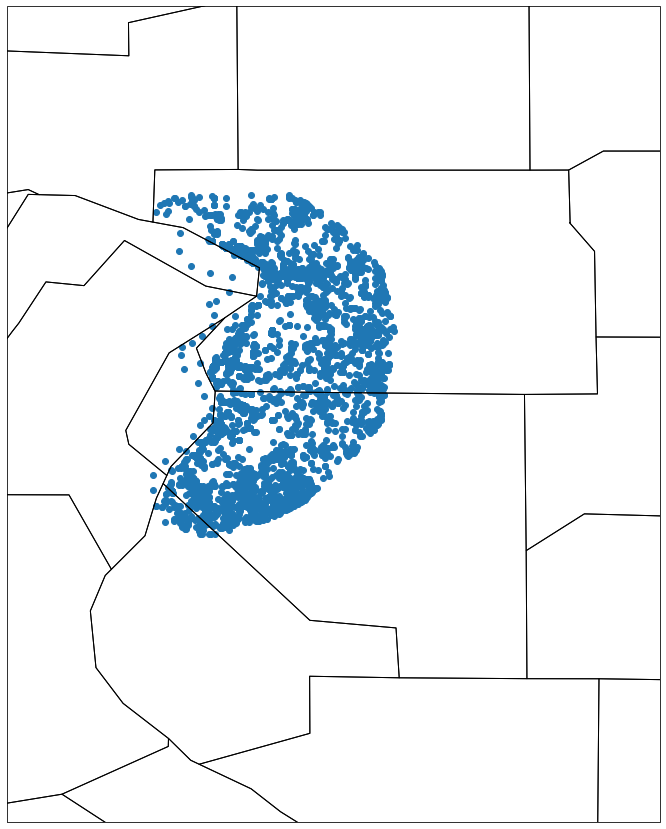

In [14]:
#Chart data 
proj = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(1, figsize=(15,15), subplot_kw=dict(projection=proj))
ax.scatter(wells['LONGITUDE'], wells['LATITUDE'])
#ax.add_feature(cartopy.feature.STATES)
ax.add_feature(USCOUNTIES)
ax.set_extent([-90.5,-89.5,38,39.25])

In [15]:
#Export data to new data frame
wells.to_csv(directory+'ESL_Wells_All_Cleaned.txt')